# 激光场构造
$E_{\omega}^{p}(t)=\frac{1}{\sqrt{1+\epsilon_{\omega}}}E_{\omega}e^{-2ln(2)(\frac{t}{\sigma})^2}cos(\omega t)\\
E_{\omega}^{s}(t)=\frac{\epsilon_{\omega}}{\sqrt{1+\epsilon_{\omega}}}E_{\omega}e^{-2ln(2)(\frac{t}{\sigma})^2}sin(\omega t)\\
E_{2\omega}^{p}(t)=\frac{1}{\sqrt{1+\epsilon_{2\omega}}}E_{2\omega}e^{-2ln(2)(\frac{t-t_0}{\sigma})^2}cos(2\omega (t-t_0))\\
E_{2\omega}^{s}(t)=\pm\frac{\epsilon_{2\omega}}{\sqrt{1+\epsilon_{2\omega}}}E_{2\omega}e^{-2ln(2)(\frac{t-t_0}{\sigma})^2}sin(2\omega (t-t_0))\\
when "+":Co-rotating ; \qquad "-":counter-rotating
$

In [1]:
from IPython.display import display_html
display_html("""<button onclick="$('.input, .prompt, .output_stderr, .output_error').toggle();">Toggle Code</button>""", raw=True)

Toggle Code

In [2]:
import numpy as np
import matplotlib.pyplot as plt

'''参数设置'''
E1 = 0.0534      #基频光电场，对于光强10^14 W/cm2
k = 1           #倍频光与基频光光强比
E2 = np.sqrt(k)*E1
w = 0.057             #800nm光频率
sigma = 8*41.34      #Gauss 半高宽
ep_FW = 1               #epliticity of FW
ep_DW = 1               #epliticity of DW
theta = 0                #relative phase
t = np.linspace(-3000,3000,10000)
dt = 1
tau = 0           # time delay

def E_FW_P(t):
    return (1/np.sqrt(1+ep_FW))*E1*np.exp(-2*np.log(2)*(t/sigma)**2)*np.cos(w*t)

def E_FW_S(t):
    return (1 / np.sqrt(1 + ep_FW)) * E1 * np.exp(-2 * np.log(2) * (t / sigma) ** 2) * np.sin(w * t)

def E_DW_P(t):
    return (1 / np.sqrt(1 + ep_DW)) * E2 * np.exp(-2 * np.log(2) * ((t-tau) / sigma) ** 2) * np.cos(2*w * (t-tau)+theta)

def E_DW_S(t):
    return (1 / np.sqrt(1 + ep_DW)) * E2 * np.exp(-2 * np.log(2) * ((t-tau) / sigma) ** 2) * np.sin(2*w * (t-tau)+theta)

def co_P(t):
    return E_DW_P(t) + E_FW_P(t)

def co_S(t):
    return E_DW_S(t) + E_FW_S(t)

def counter_P(t):
    return E_FW_P(t) + E_DW_P(t)

def counter_S(t):
    return E_FW_S(t) - E_DW_S(t)

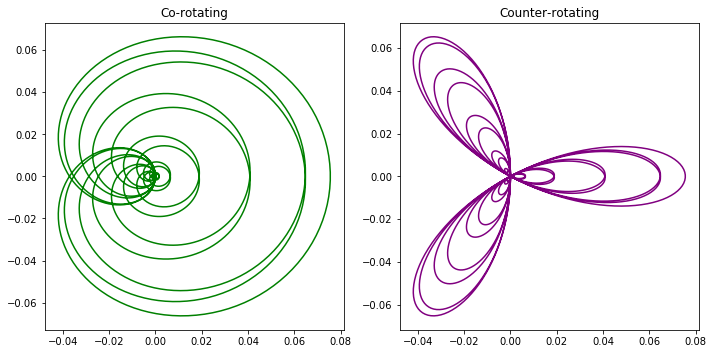

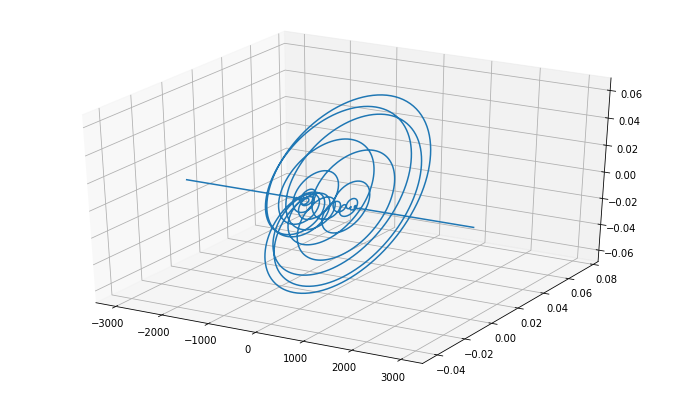

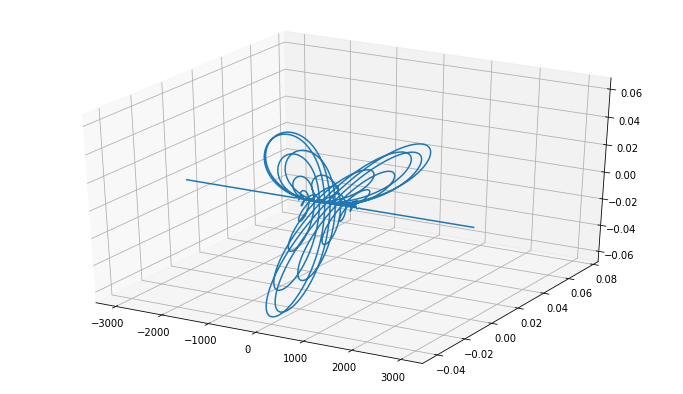

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib

def im_FW_DW():
    plt.figure(figsize=(12, 8))
    plt.subplot(4,2,1)
    plt.plot(t,E_FW_P(t),"r",label='FW_P',linestyle='-')
    plt.legend(prop={'size': 12})
    plt.subplot(4, 2, 2)
    plt.plot(t, E_FW_S(t), "r", label='FW_S', linestyle='-')
    plt.legend(prop={'size': 12})
    plt.subplot(4, 2, 3)
    plt.plot(t, E_DW_P(t), "b", label='DW_P', linestyle='-')
    plt.legend(prop={'size': 12})
    plt.subplot(4, 2, 4)
    plt.plot(t, E_DW_S(t), "b", label='DW_S', linestyle='-')
    plt.legend(prop={'size': 12})
    plt.subplot(4, 2, 5)
    plt.plot(t, co_P(t), "m", label='co_P', linestyle='-')
    plt.legend(prop={'size': 12})
    plt.subplot(4, 2, 6)
    plt.plot(t, co_S(t), "m", label='co_S', linestyle='-')
    plt.legend(prop={'size': 12})
    plt.subplot(4, 2, 7)
    plt.plot(t, counter_P(t), "g", label='counter_P', linestyle='-')
    plt.legend(prop={'size': 12})
    plt.subplot(4, 2, 8)
    plt.plot(t, counter_S(t), "g", label='counter_S', linestyle='-')
    plt.legend(prop={'size': 12})
    matplotlib.rc('xtick', labelsize=12)
    matplotlib.rc('ytick', labelsize=12)
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()
    return None

def im_Co_Counter():
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    plt.plot(co_P(t), co_S(t), "g", linestyle='-')
    plt.title("Co-rotating", size=12)
    plt.subplot(122)
    plt.plot(counter_P(t), counter_S(t), "purple", linestyle='-')
    plt.title("Counter-rotating", size=12)
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()
    return None

def im_3D_co():
    fig = plt.figure(figsize=(12, 7))
    ax = fig.gca(projection='3d')
    ax.plot(t, co_P(t), co_S(t))
    plt.show()
    return None

def im_3D_counter():
    fig = plt.figure(figsize=(12, 7))
    ax = fig.gca(projection='3d')
    ax.plot(t, counter_P(t), counter_S(t))
    plt.show()
    return None

#im_FW_DW()
im_Co_Counter()
im_3D_co()
im_3D_counter()
plt.show()

## 光强、电场、功率等
$
FWHM = 2\sqrt{2ln2}\sigma  \\
P_{peak} = 0.94\frac{单脉冲能量[J]}{FWHM} \\
I=\frac{P_{peak}}{S} \\
I=\frac{n}{2\eta}E_0^2=\frac{cn\epsilon_0}{2}E_0^2 \qquad
\Longrightarrow  \qquad E_0=\sqrt\frac{2I}{cn\epsilon_0} \\
r = 5\times10^{-3} cm  \\
S = \pi\times r^2  \\
E_J = 3 mJ \\
FWHM = 35 fs \\
\lambda=800nm \\
$

In [9]:
R = 5e-3   # 50 um 聚焦半径
s = np.pi*R**2     # cm^2
J_pulse = 3 * 1e-3    # 单脉冲能量 3mJ
FWHM = 35 * 1e-15      # 35fs
lampa = 800 * 1e-9 
P_peak = 0.94 * J_pulse/FWHM
I = P_peak/s
E0 = np.sqrt(I) * 27.5

In [10]:
P_peak

80571428571.42857

## Keldysh参数

$ U_P = \frac{e^2E_0^2}{4m_e\omega^2}=9.33\times 10^{-14}I\lambda  \\
\gamma = \sqrt\frac{I_p}{2U_P}  \\
when \quad   \gamma\ll1 \qquad Tunneling \quad ionization \\
\quad\qquad   \gamma\gg1 \qquad Multiphoton \quad ionization
$

In [10]:
I_p = 15.56     # 氮气的电离能
U_p = 9.33e-14 * I * lampa * 1e6    
gmma = np.sqrt(I_p/(2*U_p))

In [11]:
gmma

0.20867479675373077